In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
# Dùng thư viện yfinance để tải dataset 
import yfinance as yf

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
import math

In [ ]:
df = pd.read_csv('ETH-USD.csv')

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/1/2019,133.418152,141.397507,132.650711,140.819412,140.819412,2258709868
1,1/2/2019,141.519516,156.929138,140.650955,155.047684,155.047684,3328240369
2,1/3/2019,155.196045,155.863052,147.198364,149.135010,149.135010,2676164880
3,1/4/2019,148.912888,156.878983,147.907104,154.581940,154.581940,3126192535
4,1/5/2019,154.337418,160.824890,154.337418,155.638596,155.638596,3338211928


**<h3>ARIMA 6-3-1</h3>**

In [ ]:
df = df[['Date', 'Close']]
df = df.dropna() # Drop missing values
# df = df.reset_index(drop=True) # Reset the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Split the data into training, testing, and validation sets
train_size = int(0.6 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]
print(df)

                  Close
Date                   
2019-01-01   140.819412
2019-01-02   155.047684
2019-01-03   149.135010
2019-01-04   154.581940
2019-01-05   155.638596
...                 ...
2023-03-27  1715.460815
2023-03-28  1772.785645
2023-03-29  1793.001831
2023-03-30  1792.737183
2023-03-31  1822.022095

[1551 rows x 1 columns]


In [ ]:
print(len(df))
print(len(train_data))
print(train_size)

1551
930
930


In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 33.0 MB/s eta 0:00:00


In [ ]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=10493.298, Time=1.32 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=10534.801, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=10507.649, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=10513.967, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=10533.477, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=10493.148, Time=1.25 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=10494.871, Time=0.36 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=10491.305, Time=1.58 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=10495.902, Time=2.66 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=10495.552, Time=0.34 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=10490.133, Time=0.63 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=10512.896, Time=0.27 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=10506.611, Time=0.09 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=10494.531, Time=0.89 sec
 ARIMA(1,1,2)(0,0,0

ARIMA(order=(1, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [ ]:
# 4. Quá trình testing 
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(n_periods=len(y_test))

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(n_periods=len(y_val))

In [ ]:
import datetime
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
print(last_index)
next_30_days_index = pd.date_range(start=last_index + datetime.timedelta(days=1), periods=30, freq='D')
print(next_30_days_index)
# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(next_30_days_index).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days)) 

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

2023-03-31 00:00:00
DatetimeIndex(['2023-04-01', '2023-04-02', '2023-04-03', '2023-04-04',
               '2023-04-05', '2023-04-06', '2023-04-07', '2023-04-08',
               '2023-04-09', '2023-04-10', '2023-04-11', '2023-04-12',
               '2023-04-13', '2023-04-14', '2023-04-15', '2023-04-16',
               '2023-04-17', '2023-04-18', '2023-04-19', '2023-04-20',
               '2023-04-21', '2023-04-22', '2023-04-23', '2023-04-24',
               '2023-04-25', '2023-04-26', '2023-04-27', '2023-04-28',
               '2023-04-29', '2023-04-30'],
              dtype='datetime64[ns]', freq='D')
Predicted closing prices for the next 30 days:
[1894.84424578 1895.41543379 1894.95454132 1895.32643615 1895.02635365
 1895.26849068 1895.07310994 1895.23076295 1895.1035525  1895.20619881
 1895.12337335 1895.19020534 1895.1362785  1895.17979215 1895.14468092
 1895.17301222 1895.15015165 1895.16859788 1895.15371359 1895.16572375
 1895.15603273 1895.16385243 1895.1575427  1895.16263403 189

In [ ]:
# 12. Đánh giá độ chính xác thuật toán
import sklearn.metrics as metrics
mae = mean_absolute_error(y_test,y_pred)
print('Testing MAE: ', mae)
mae = mean_absolute_error(y_val,y_pred_val)
print('Validation MAE: ', mae)

Testing MAE:  1058.6216071301242
Validation MAE:  433.35321961056457


In [ ]:
mse = mean_squared_error(y_test,y_pred)
print('Testing MSE: ', mse)
mse = mean_squared_error(y_val,y_pred_val)
print('Validation MSE: ', mse)

Testing MSE:  1652542.0289310974
Validation MSE:  230621.50744336366


In [ ]:
rmse = math.sqrt(mean_squared_error(y_test,y_pred))
print('Testing RMSE: ', rmse)
rmse = math.sqrt(mean_squared_error(y_val, y_pred_val))
print('Validation RMSE: ', rmse)

Testing RMSE:  1285.5123604738685
Validation RMSE:  480.23068148897323


In [ ]:
r2 = r2_score(y_test, y_pred)
print('Testing R-Square:', r2)
r2 = r2_score(y_val, y_pred_val)
print('Validation R-Square: ', r2)

Testing R-Square: -0.570611358222916
Validation R-Square:  -4.385039521414266


In [ ]:
mape = np.mean(np.abs(y_pred - y_test)/np.abs(y_test))
print('Testing MAPE: ', mape)
mape = np.mean(np.abs(y_pred_val - y_val)/np.abs(y_val))
print('Validation MAPE: ', mape)


Testing MAPE:  0.37153034119591216
Validation MAPE:  0.3236041340909358


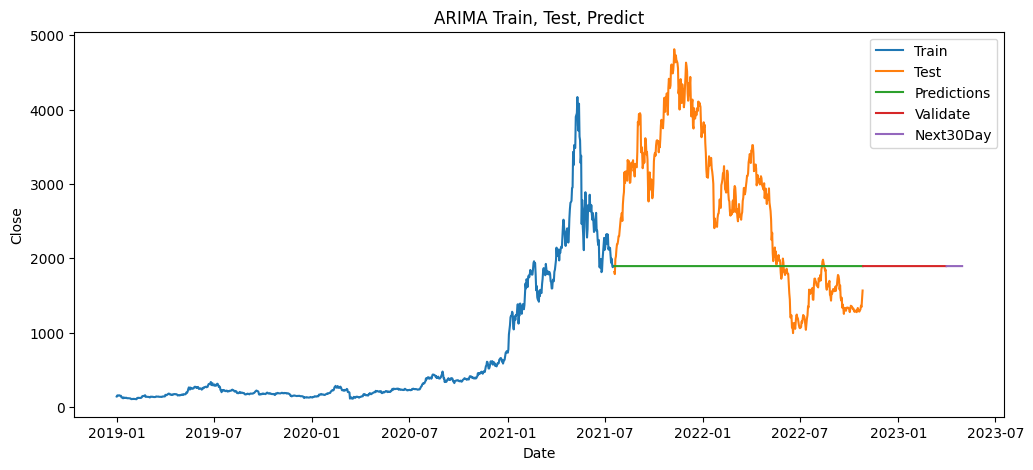

In [ ]:
# 9.Vẽ hình
plt.figure(figsize=(12,5), dpi=100)
plt.ylabel('Close');
plt.xlabel('Date');
plt.title('ARIMA Train, Test, Predict')
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(next_30_days_index,y_next_30_days)

plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()